In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#twitter api req

consumer_key = 'OghYPlGodEcgozxuNVr5c5294'
consumer_secret = 'yHNzTz2WMoFvmMyUYPc5h2xqjn3Rjz1Ryc494gxf5SFwMzFG6F'
access_token = '2408033235-cChNchze46vnUMT97ECabw73MsCWAeUm7vrWslh'
access_token_secret = '3afWisufWn9u9LbMQu6v06XPbUak9DESRGnp3PF4xAZb0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#create api obj
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
#extract all tweets form the twitter user

posts = []
for tweet in tweepy.Cursor(api.user_timeline, screen_name="SwipeWright", ).items():
    posts.append(tweet)



In [4]:
i = 1
#print tweets
print("Show the tweets:\n")
for tweet in posts:
    print(str(i) + ")" + tweet.text+"\n")
    i += 1

Show the tweets:

1)RT @CEJacksonLaw: One of many “resources by teachers for teachers” designed to distract from schools’ failures to actually educate our kids…

2)@OriginalRecipeG Thank you for the thoughtful segment and shout-out! ❤️

3)@FormerlyWoke @buttonslives I am ashamed to say we haven't been to either. 😬

4)Check out this conversation with Stephanie for her new podcast! It was a great time. https://t.co/FyEeBOqX92

5)RT @sometherapist: How did a mild-mannered academic scientist find himself a target of vitriol amidst unexpected controversy? Colin tells u…

6)RT @sometherapist: You Must Be Some Kind of Therapist Podcast is live!

You can now listen to the first 4 episodes on all streaming platfor…

7)@MsMelChen I love Gibbs so much. He defended me when you mock-attacked me. I won't forget that Gibbs! ♥️

8)RT @ShellenbergerMD: Californians pay super-high taxes. We deserve nice things. Why then don't we demand them?

I blame Big Lebowski Syndro…

9)@McCormickProf It can't come 

In [5]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove  @mentions
    text = re.sub(r'#', '', text) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) #remove the hyper link

    return text

df = pd.DataFrame([tweet.text for tweet in posts], columns=['Tweets'])
df['Tweets'] = df['Tweets'].apply(cleanTxt)
#print
df

,Tweets
0,: One of many “resources by teachers for teach...
1,Thank you for the thoughtful segment and shou...
2,I am ashamed to say we haven't been to eithe...
3,Check out this conversation with Stephanie for...
4,: How did a mild-mannered academic scientist f...
...,...
3237,: Support Sex Matters campaign for clarity on ...
3238,_org Thanks Clara!
3239,: Denver Public Schools now promoting racially...
3240,_mehra Thanks Kushal!


In [6]:
keywords = ['evo', 'evolution','ape', 'overproduction', 'adaption', 'organism', 'speciation', 'variation', 'metamorphosis', 'habitat', 'ecosystem', 'ancestor', 'taxonomy', 'taconomic', 'cell', 'inheritance', 'root', 'biology', 'Darwin', 'Natural Selection', 'Origin', 'botanic', 'cholorplast', 'classification', 'clone', 'mutation', 'isolation', 'cytoplasm', 'dna', 'ecology', 'embryo', 'eukaryotic', 'rna', 'fauna', 'flora', 'fetus', 'fossil', 'fungi', 'gene', 'genetic', 'genome', 'dinosour']
evoRTweets = []
i = 0

count = 0
for tweet in df['Tweets']:
    if any(keyword in tweet for keyword in keywords):
        evoRTweets.append(tweet)
        count+=1
    i+=1

dfEvo = pd.DataFrame([item for item in evoRTweets], columns=['Tweets'])

dfEvo


,Tweets
0,I'm still being denied verification even thoug...
1,"Oops, it's jalapeno limeade, not lemonade!"
2,This drink shall be known as: A Hot Date.\n\n1...
3,"One shot mezcal, one shot jalapeno lemonade, ..."
4,It really is! I made a second one but with a ...
...,...
127,"Once the old guard is out, there will no longe..."
128,": My Chat with Geophysicist Dr. Dorian Abbot, ..."
129,: We should put more effort into forgiving tha...
130,": .: sex isn't ""assigned,"" it exists. It's obs..."


In [7]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


#create two new colums
dfEvo['Subjectivity'] = dfEvo['Tweets'].apply(getSubjectivity)
dfEvo['Polarity'] = dfEvo['Tweets'].apply(getPolarity)

#show the new dataframe with new columns
dfEvo


,Tweets,Subjectivity,Polarity
0,I'm still being denied verification even thoug...,0.125,0.0000
1,"Oops, it's jalapeno limeade, not lemonade!",0.000,0.0000
2,This drink shall be known as: A Hot Date.\n\n1...,0.850,0.2500
3,"One shot mezcal, one shot jalapeno lemonade, ...",0.500,-0.1875
4,It really is! I made a second one but with a ...,0.300,0.2500
...,...,...,...
127,"Once the old guard is out, there will no longe...",0.100,0.0500
128,": My Chat with Geophysicist Dr. Dorian Abbot, ...",0.000,0.0000
129,: We should put more effort into forgiving tha...,0.500,0.5000
130,": .: sex isn't ""assigned,"" it exists. It's obs...",0.400,-0.1000


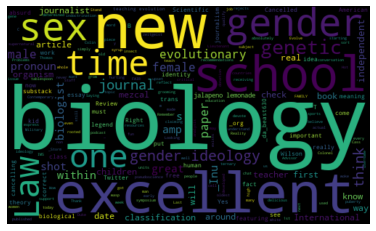

In [8]:
# plot the word cloud

allWords = ' '.join([twts for twts in dfEvo['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

dfEvo['Analysis'] = dfEvo['Polarity'].apply(getAnalysis)

#show dataframe
dfEvo

,Tweets,Subjectivity,Polarity,Analysis
0,I'm still being denied verification even thoug...,0.125,0.0000,Neutral
1,"Oops, it's jalapeno limeade, not lemonade!",0.000,0.0000,Neutral
2,This drink shall be known as: A Hot Date.\n\n1...,0.850,0.2500,Positive
3,"One shot mezcal, one shot jalapeno lemonade, ...",0.500,-0.1875,Negative
4,It really is! I made a second one but with a ...,0.300,0.2500,Positive
...,...,...,...,...
127,"Once the old guard is out, there will no longe...",0.100,0.0500,Positive
128,": My Chat with Geophysicist Dr. Dorian Abbot, ...",0.000,0.0000,Neutral
129,: We should put more effort into forgiving tha...,0.500,0.5000,Positive
130,": .: sex isn't ""assigned,"" it exists. It's obs...",0.400,-0.1000,Negative


In [10]:
#get the percentage of positive tweets
ptweets = dfEvo[dfEvo.Analysis == 'Positive']
ptweets = ptweets['Tweets']


round((ptweets.shape[0] / dfEvo.shape[0])* 100, 1) 

57.6

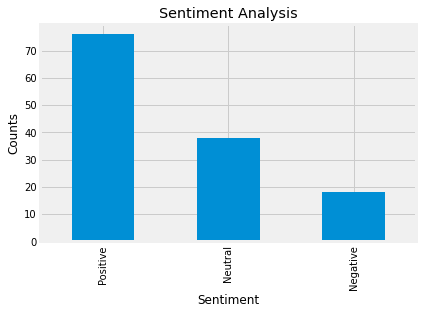

In [11]:
#show the value counts

dfEvo['Analysis'].value_counts()

#plot and visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dfEvo['Analysis'].value_counts().plot(kind='bar')
plt.show()